In [7]:
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from shap import PermutationExplainer

In [8]:
df = pd.read_csv("../data/EURUSD_H4_with_indicators.csv")
model = joblib.load("../models/gradient_boosting_trading_model.pkl")

In [9]:
features = ['<TICKVOL>', 'atr', 'bb_bandwidth', 'bb_lower', 'bb_upper',
            'ema_50', 'macd', 'macd_diff', 'macd_signal', 'rsi', 'stoch_k']
X = df[features].dropna()

In [10]:
explainer = PermutationExplainer(model.predict_proba, X, seed=42)
shap_values = explainer(X)

PermutationExplainer explainer: 2261it [03:39,  9.96it/s]                          


/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_78602/2515152784.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="bar")


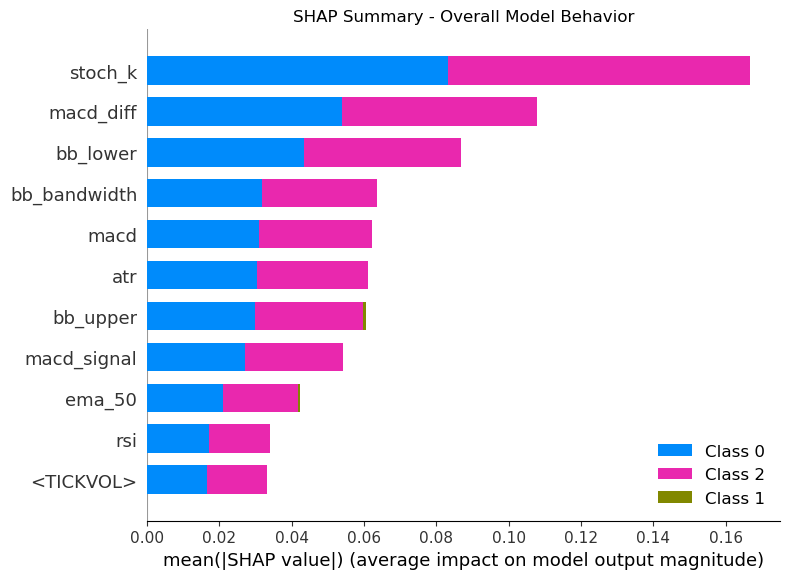

In [11]:
plt.title("SHAP Summary - Overall Model Behavior")
shap.summary_plot(shap_values, X, plot_type="bar")

In [12]:
latest = df[features].iloc[[-1]]
shap_latest = explainer(latest)

In [14]:
model.classes_

array(['Buy', 'Hold', 'Sell'], dtype=object)

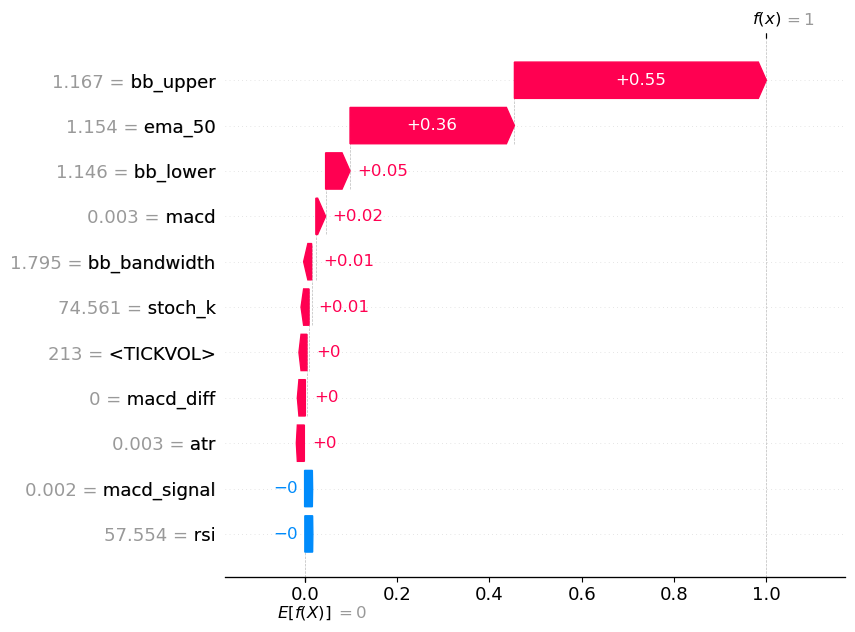

In [17]:
class_index = list(model.classes_).index("Hold")
shap.plots.waterfall(shap_latest[0, :, class_index], max_display=12)



🔍 SHAP Scatter για <TICKVOL> → class 'Buy'


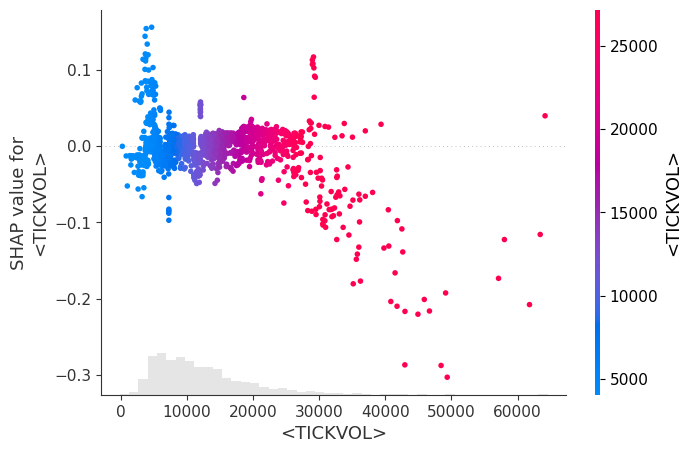


🔍 SHAP Scatter για atr → class 'Buy'


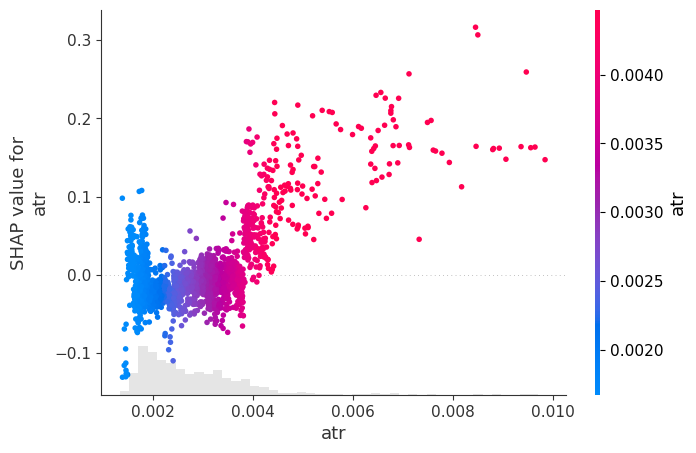


🔍 SHAP Scatter για bb_bandwidth → class 'Buy'


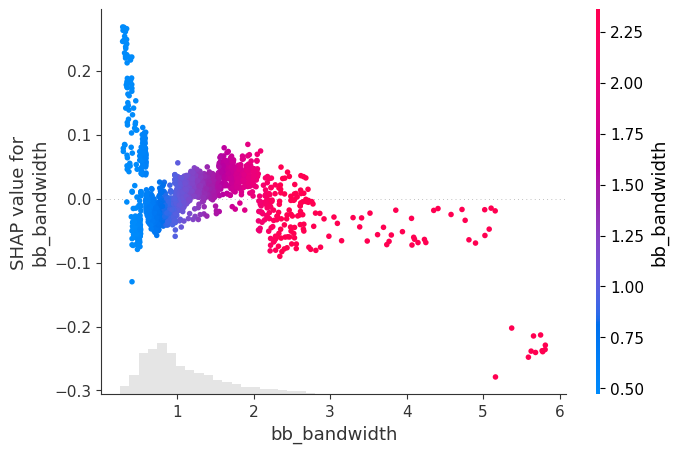


🔍 SHAP Scatter για bb_lower → class 'Buy'


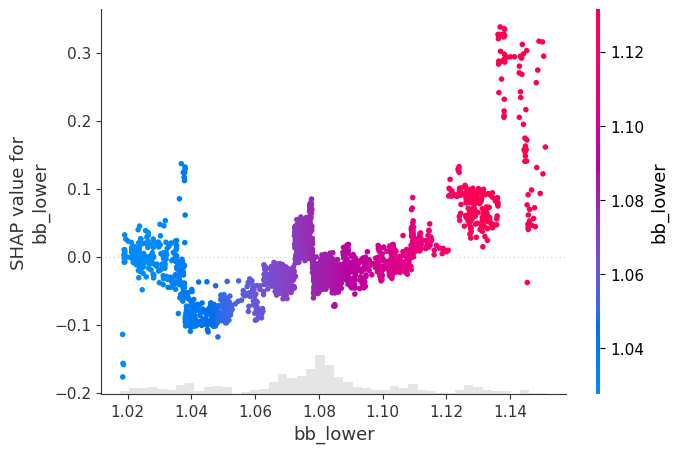


🔍 SHAP Scatter για bb_upper → class 'Buy'


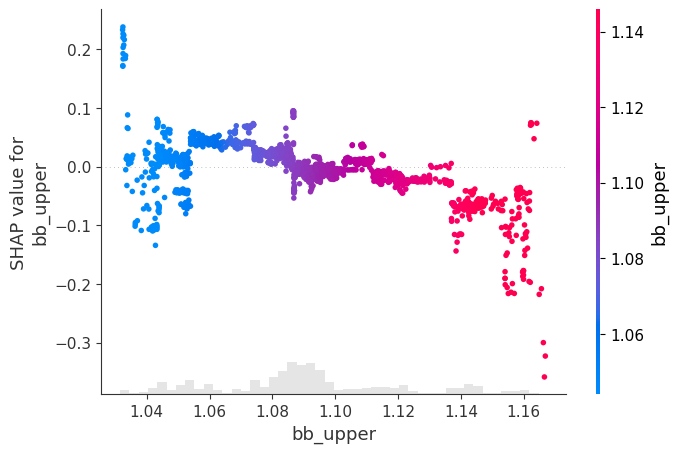


🔍 SHAP Scatter για ema_50 → class 'Buy'


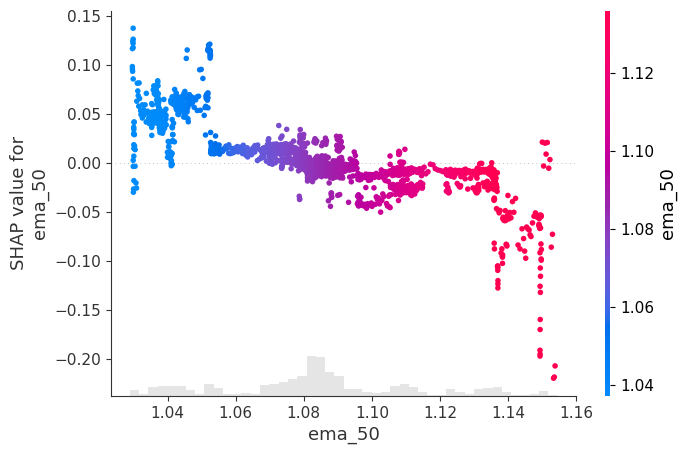


🔍 SHAP Scatter για macd → class 'Buy'


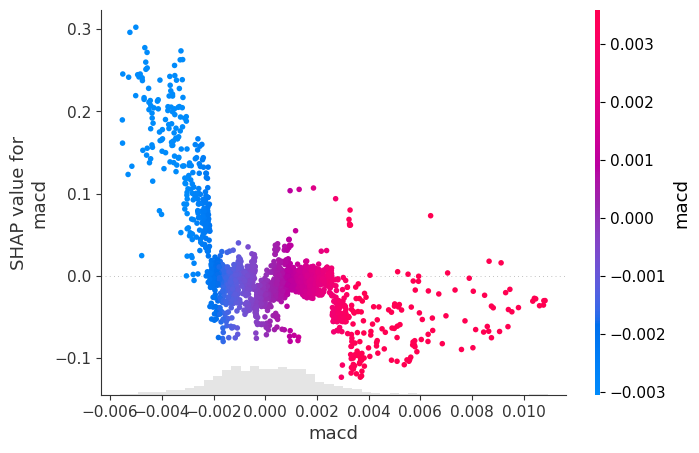


🔍 SHAP Scatter για macd_diff → class 'Buy'


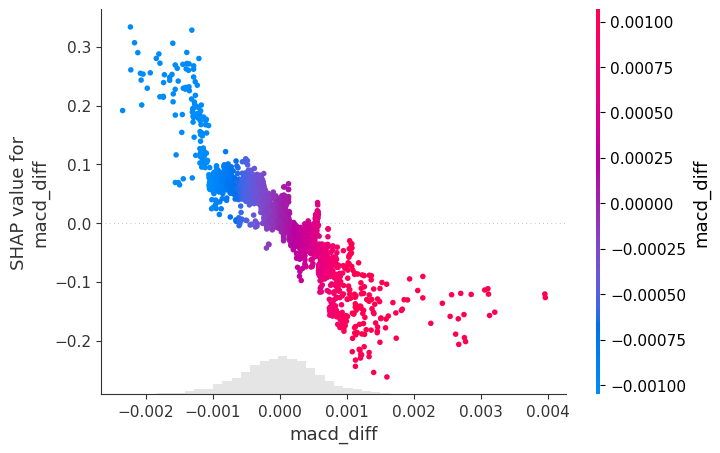


🔍 SHAP Scatter για macd_signal → class 'Buy'


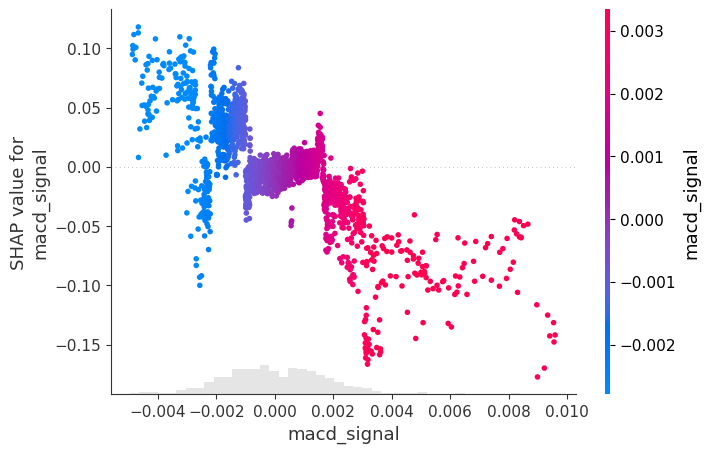


🔍 SHAP Scatter για rsi → class 'Buy'


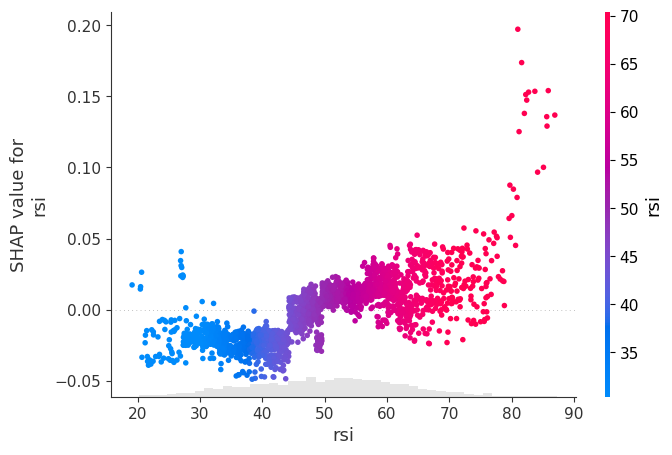


🔍 SHAP Scatter για stoch_k → class 'Buy'


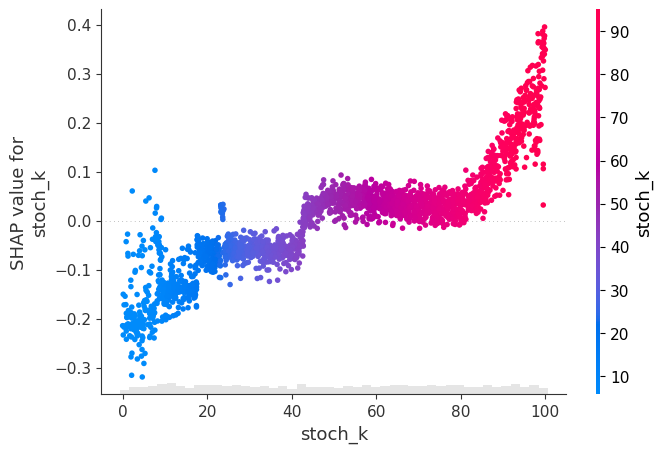

In [23]:
target_class = "Buy"
buy_index = list(model.classes_).index(target_class)

for col in features:
    print(f"\n🔍 SHAP Scatter για {col} → class '{target_class}'")
    shap.plots.scatter(shap_values[:, col, buy_index], color=shap_values[:, col, buy_index])


🔍 SHAP Scatter για <TICKVOL> → class 'Sell'


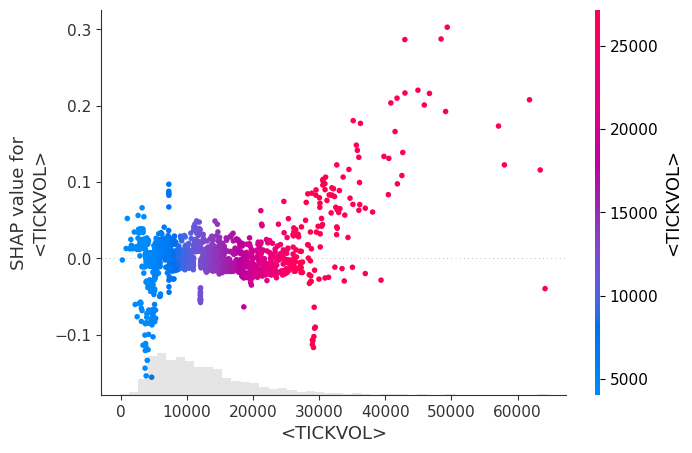


🔍 SHAP Scatter για atr → class 'Sell'


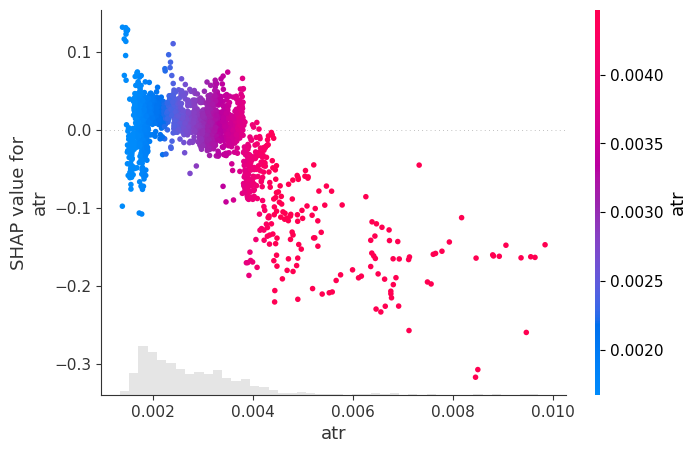


🔍 SHAP Scatter για bb_bandwidth → class 'Sell'


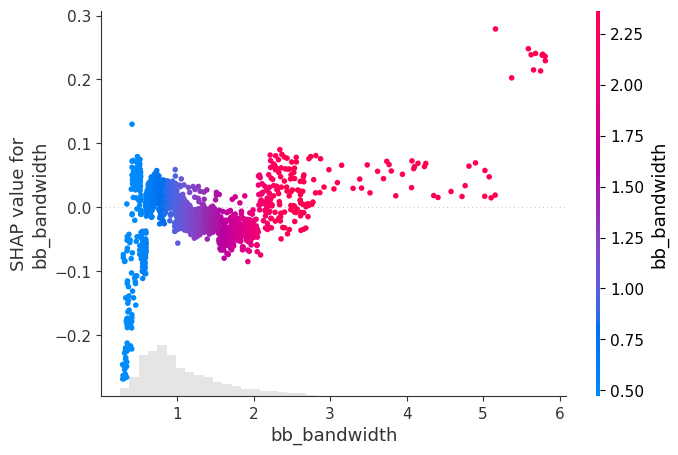


🔍 SHAP Scatter για bb_lower → class 'Sell'


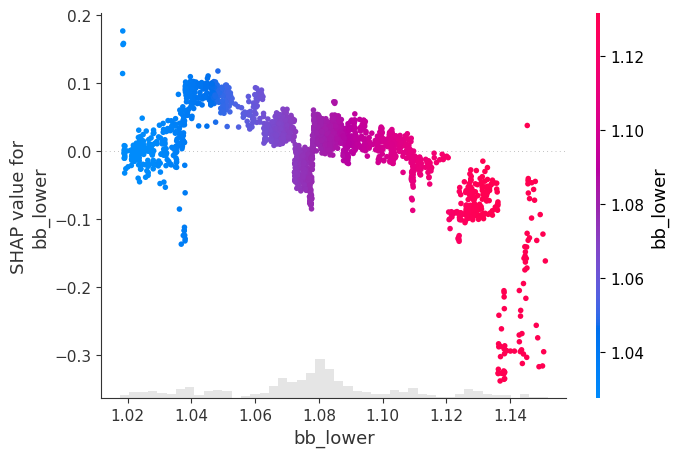


🔍 SHAP Scatter για bb_upper → class 'Sell'


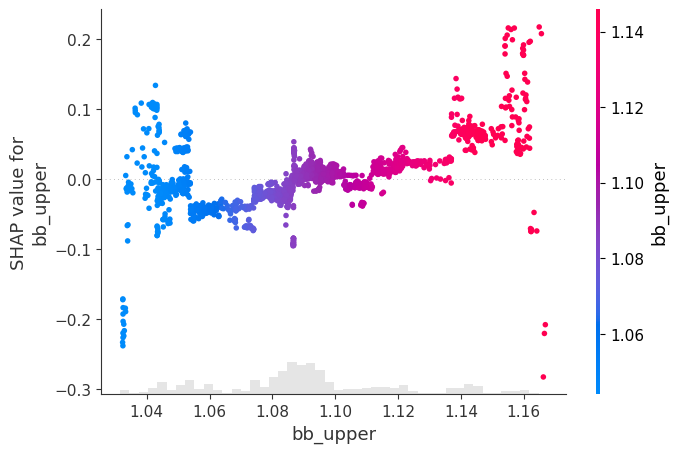


🔍 SHAP Scatter για ema_50 → class 'Sell'


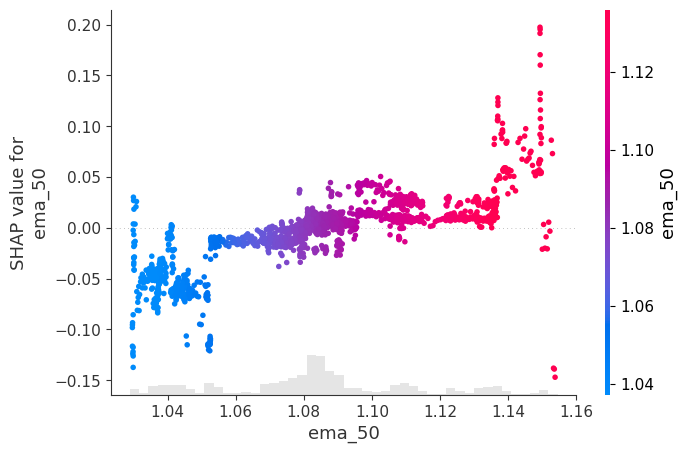


🔍 SHAP Scatter για macd → class 'Sell'


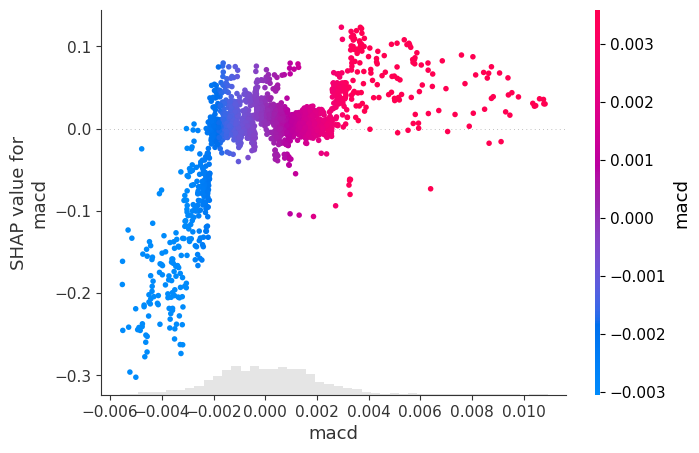


🔍 SHAP Scatter για macd_diff → class 'Sell'


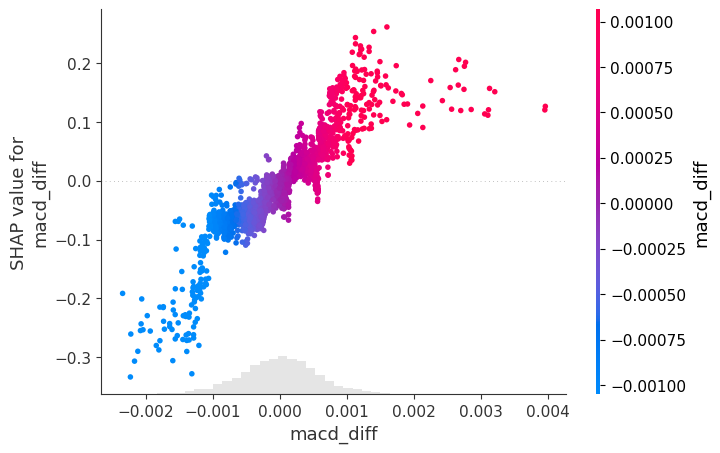


🔍 SHAP Scatter για macd_signal → class 'Sell'


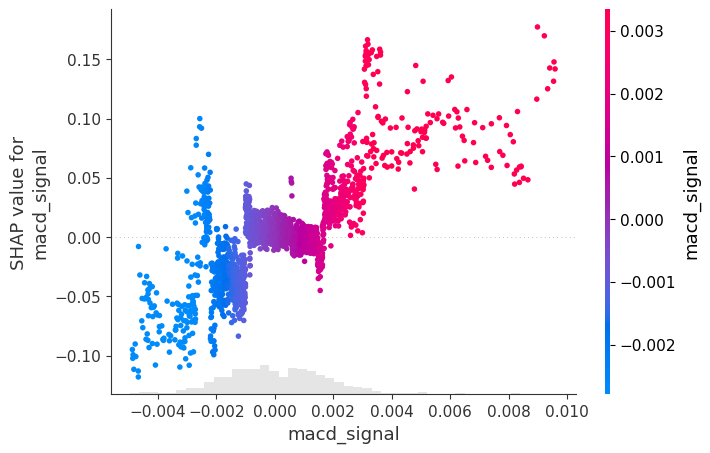


🔍 SHAP Scatter για rsi → class 'Sell'


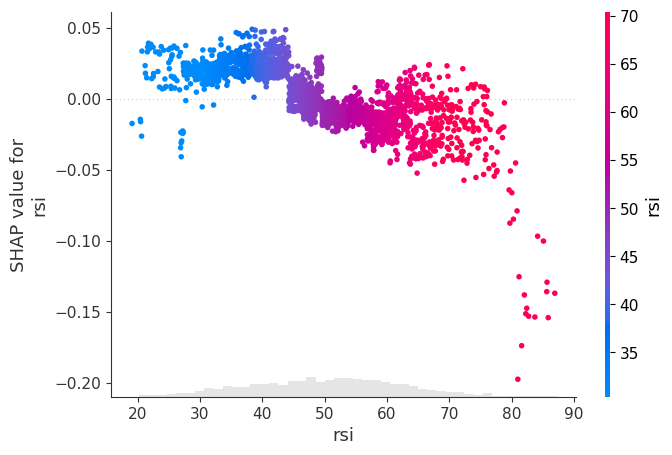


🔍 SHAP Scatter για stoch_k → class 'Sell'


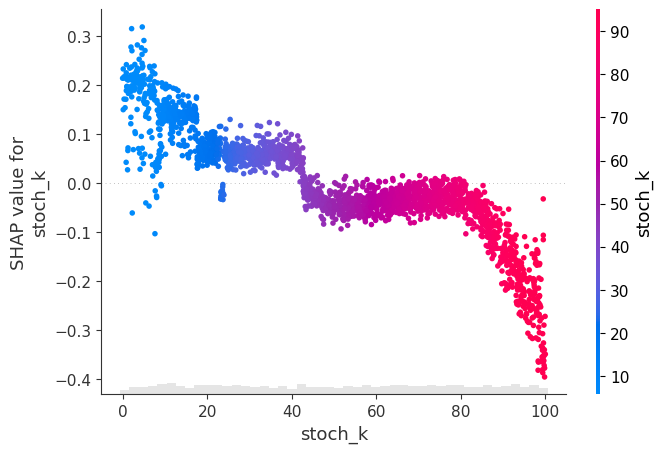

In [22]:
target_class = "Sell"
sell_index = list(model.classes_).index(target_class)

for col in features:
    print(f"\n🔍 SHAP Scatter για {col} → class '{target_class}'")
    shap.plots.scatter(shap_values[:, col, sell_index], color=shap_values[:, col, sell_index])
